# --- Hebbian Learning Test Notebook ---

In [2]:
import numpy as np
import pandas as pd
import sys, os

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.preprocessing.normalizer import normalize_dataset
from src.preprocessing.binarizer import generate_binary_dataset
from src.hebbian.hebbian_learning import run_hebbian_learning
from src.project_utils.data_loader import load_raw_student_data

In [ ]:
# Load dataset
df = load_raw_student_data()
print("Loaded dataset shape:", df.shape)
df.head()

Merged Dataset Size: 382
Loaded dataset shape: (382, 53)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# --- Normalize ---
X_norm = normalize_dataset(df=df, save=False)
print("Normalized shape:", X_norm.shape)

Numeric columns: 29
Normalized shape: (382, 53)


In [4]:
# --- Binarize ---
X_bin = generate_binary_dataset(data=X_norm, save=False)
print("Binary shape:", X_bin.shape)
print("Sample binary data:")
print(X_bin[:5, :10])  # Show first 5 rows, first 10 columns

Binary shape: (382, 307)
Sample binary data:
[[ True False  True False False False False  True False False]
 [ True False  True False False False  True False False False]
 [ True False  True False  True False False False False False]
 [ True False  True False  True False False False False False]
 [ True False  True False False  True False False False False]]


In [5]:
# --- Hebbian weights ---
weights = run_hebbian_learning(data=X_bin, save=False)

print("\nHebbian Weight Matrix Shape:", weights.shape)

Running Hebbian Learning on dataset of shape: (382, 307)
Hebbian learning completed.
Weight matrix shape: (307, 307)

Hebbian Weight Matrix Shape: (307, 307)


In [6]:
# Show top correlations
corr_strength = np.sum(np.abs(weights), axis=1)
top_idx = np.argsort(corr_strength)[-10:]

print("Top 10 strongest features (by correlation strength):")
for idx in reversed(top_idx):
    print(f"Feature {idx}: {corr_strength[idx]:.2f}")

Top 10 strongest features (by correlation strength):
Feature 209: 18928.00
Feature 67: 18928.00
Feature 204: 18512.00
Feature 196: 18096.00
Feature 16: 17888.00
Feature 0: 17784.00
Feature 200: 17264.00
Feature 56: 17212.00
Feature 69: 16848.00
Feature 52: 16432.00


In [7]:
# Save weights
weights_path = os.path.join(project_root, "models", "hebbian_weights.npy")
os.makedirs(os.path.dirname(weights_path), exist_ok=True)
np.save(weights_path, weights)
print(f"Weights saved to: {weights_path}")

Weights saved to: /raid/home/dgxuser16/NTL/norman/Aditya/AdaptiveLearningSystem/models/hebbian_weights.npy


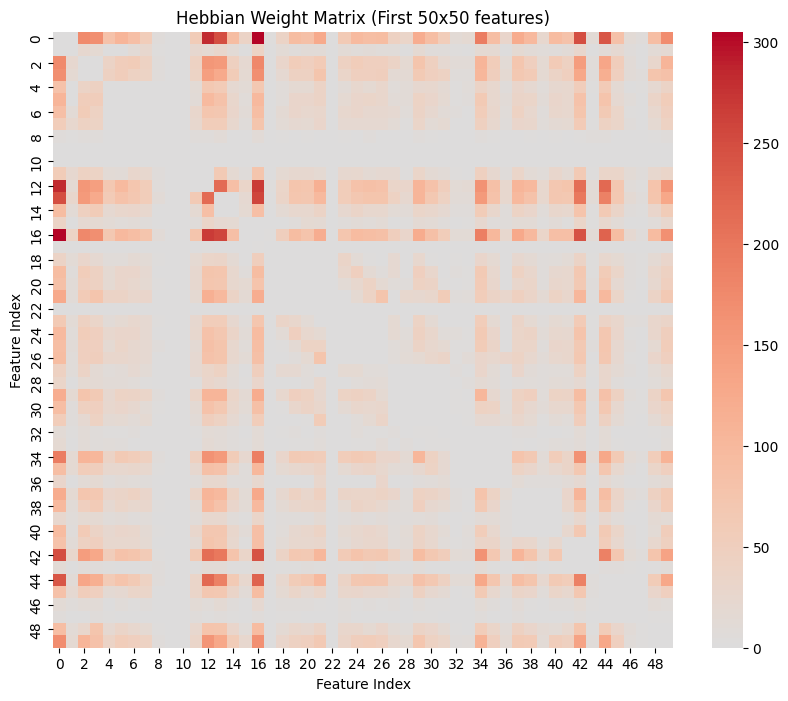

In [8]:
# Visualize weight matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(weights[:50, :50], cmap="coolwarm", center=0, cbar=True)
plt.title("Hebbian Weight Matrix (First 50x50 features)")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()